# Momenclatura y modelo 



- En esta tarea te familizarás con la notación.
- Aprenderas a implementar el modelo $f_{w,b}$ para regresión lineal de una variable. 

## Notation
Here is a summary of some of the notation you will encounter.  

<img align="left" src="./notacion.png"     style=" width:680px; padding: 10px; " > 





## Tools
In this lab you will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

ModuleNotFoundError: No module named 'matplotlib'

# Problema de ejemplo

Consideremos un ejemplo de una compañia de bienes raices que quiere predecir el precio de una casa en base al tamaño de la casa en metros cuadrados.

En este ejemplo solo se tienen dos casas prevaimente vendidas para realizar el entrenamiento:


| tañaño (m2)     | precio (pesos) |
| -------------------| ------------------------ |
| 100.0               | 340,000                      |
| 180.0               | 520,000                      |

Queremos generar un modelo de regresión lineal estos dos puntos para porteriormente realizar una predicción de precio de una casa nueva de 130 m2.


Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [2]:
# x_train is the input variable (size in m2)
# y_train is the target (precio en pesos)
x_train = np.array([100.0,180.0])
y_train = np.array([340000.0,520000.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [100. 180.]
y_train = [340000. 520000.]


>**Note**: The course will frequently utilize the python 'f-string' output formatting described [here](https://docs.python.org/3/tutorial/inputoutput.html) when printing. The content between the curly braces is evaluated when producing the output.

### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


One can also use the Python `len()` function as shown below.

In [4]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (100.0, 340,000.0) and (x$^{(1)}$, y$^{(1)}$) is (180.0, 520,000.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [5]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (100.0, 340000.0)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

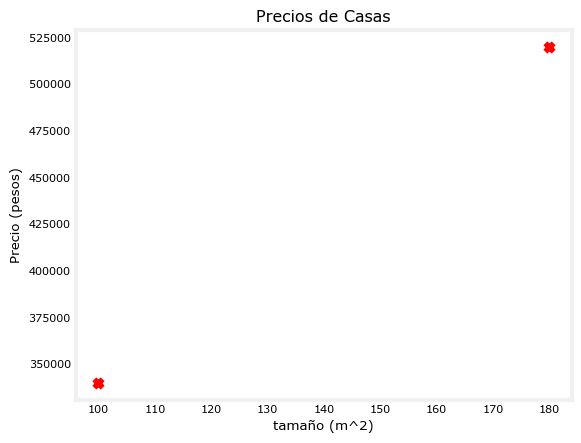

In [87]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Precios de Casas")
# Set the y-axis label
plt.ylabel('Precio (pesos)')
# Set the x-axis label
plt.xlabel('tamaño (m^2)')
plt.show()

## Model function


$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> 

EJEMPLO: Let's start with $w = 400$ and $b = 100000$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [88]:
w = 400
b = 100000
print(f"w: {w}")
print(f"b: {b}")

w: 400
b: 100000


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [89]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

In [6]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Precios de casas")
# Set the y-axis label
plt.ylabel('Precio (pesos)')
# Set the x-axis label
plt.xlabel('Tamaño (m2)')
plt.legend()
plt.show()

NameError: name 'compute_model_output' is not defined

As you can see, setting $w = 400$ and $b = 100000$ does *not* result in a line that fits our data. 

### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

#### Tip:
You can use your mouse to click on the triangle to the left of the green "Hints" below to reveal some hints for choosing b and w.

## Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 130 m2. 


In [7]:
w = 400                         
b = 100000    
x_i = 130
cost_130m2 = w * x_i + b    

print(f"${cost_130m2:.0f} mil pesos")

$152000 mil pesos


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.